In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=200)

Epoch 1/200
163/163 [==============================] - 20s 123ms/step - loss: 0.4617 - tp: 3894.0000 - fp: 1337.0000 - tn: 3865.0000 - fn: 1308.0000 - accuracy: 0.7458 - precision: 0.7444 - recall: 0.7486 - auc: 0.8530 - val_loss: 0.5833 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.7676
Epoch 2/200
163/163 [==============================] - 14s 88ms/step - loss: 0.2208 - tp: 4731.0000 - fp: 477.0000 - tn: 4725.0000 - fn: 471.0000 - accuracy: 0.9089 - precision: 0.9084 - recall: 0.9095 - auc: 0.9706 - val_loss: 0.4299 - val_tp: 247.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 57.0000 - val_accuracy: 0.7812 - val_precision: 0.7647 - val_recall: 0.8125 - val_auc: 0.89060 - tn: 1230.0000 
Epoch 3/200
163/163 [==============================] - 14s 86ms/step - loss: 0.2244 - tp: 4739.0000 - fp: 486.0000 - tn: 4730.0000 - fn: 477.0000 - accuracy: 0.9077 - precision: 0.9070 - re

Epoch 22/200
163/163 [==============================] - 12s 75ms/step - loss: 0.1414 - tp: 4908.0000 - fp: 290.0000 - tn: 4912.0000 - fn: 294.0000 - accuracy: 0.9439 - precision: 0.9442 - recall: 0.9435 - auc: 0.9876 - val_loss: 0.3667 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9102: 3688.0000 - fp: 229.0000 - tn: 3693.0000 - fn: 234.0000 - accuracy: 0.9410 - precision: 0.9415 - r
Epoch 23/200
163/163 [==============================] - 13s 81ms/step - loss: 0.1468 - tp: 4904.0000 - fp: 310.0000 - tn: 4906.0000 - fn: 312.0000 - accuracy: 0.9404 - precision: 0.9405 - recall: 0.9402 - auc: 0.9865 - val_loss: 0.4567 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8379
Epoch 24/200
163/163 [==============================] - 14s 88ms/step - loss: 0.1426 - tp: 4912.0000 - fp: 2

Epoch 42/200
163/163 [==============================] - 15s 89ms/step - loss: 0.1191 - tp: 4956.0000 - fp: 247.0000 - tn: 4955.0000 - fn: 246.0000 - accuracy: 0.9526 - precision: 0.9525 - recall: 0.9527 - auc: 0.9909 - val_loss: 0.3683 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9141
Epoch 43/200
163/163 [==============================] - 14s 85ms/step - loss: 0.1085 - tp: 4978.0000 - fp: 221.0000 - tn: 4981.0000 - fn: 224.0000 - accuracy: 0.9572 - precision: 0.9575 - recall: 0.9569 - auc: 0.9925 - val_loss: 0.4446 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8477
Epoch 44/200
163/163 [==============================] - 14s 87ms/step - loss: 0.1267 - tp: 4947.0000 - fp: 252.0000 - tn: 4950.0000 - fn: 255.0000 - accuracy: 0.9513 - precision: 0.9515 - recall: 0.9510 - auc

Epoch 63/200
163/163 [==============================] - 13s 82ms/step - loss: 0.1097 - tp: 4964.0000 - fp: 242.0000 - tn: 4960.0000 - fn: 238.0000 - accuracy: 0.9539 - precision: 0.9535 - recall: 0.9542 - auc: 0.9924 - val_loss: 0.5252 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7891
Epoch 64/200
163/163 [==============================] - 14s 83ms/step - loss: 0.1062 - tp: 4982.0000 - fp: 233.0000 - tn: 4983.0000 - fn: 234.0000 - accuracy: 0.9552 - precision: 0.9553 - recall: 0.9551 - auc: 0.9931 - val_loss: 0.4463 - val_tp: 209.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 95.0000 - val_accuracy: 0.6562 - val_precision: 0.6471 - val_recall: 0.6875 - val_auc: 0.8242
Epoch 65/200
163/163 [==============================] - 13s 81ms/step - loss: 0.1037 - tp: 4979.0000 - fp: 209.0000 - tn: 4979.0000 - fn: 209.0000 - accuracy: 0.9597 - precision: 0.9597 - recall: 0.9597 - 

163/163 [==============================] - 13s 78ms/step - loss: 0.1018 - tp: 4985.0000 - fp: 215.0000 - tn: 4987.0000 - fn: 217.0000 - accuracy: 0.9585 - precision: 0.9587 - recall: 0.9583 - auc: 0.9935 - val_loss: 0.4772 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8516 - fp: 212.0000 - tn: 4926.0000 - fn: 214.0000 - accuracy: 0.9585 - precision: 0.9587 - recall: 0.9583 - auc: 0.993
Epoch 84/200
163/163 [==============================] - 13s 82ms/step - loss: 0.0965 - tp: 5019.0000 - fp: 199.0000 - tn: 5017.0000 - fn: 197.0000 - accuracy: 0.9620 - precision: 0.9619 - recall: 0.9622 - auc: 0.9939 - val_loss: 0.4859 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.81053.0000 - fn: 145.0000 - accuracy: 0.9619 - precision: 0.9619 - recall: 0.9619 - auc: 0. - ETA: 1s - loss: 0

163/163 [==============================] - 14s 84ms/step - loss: 0.0994 - tp: 4996.0000 - fp: 205.0000 - tn: 4997.0000 - fn: 206.0000 - accuracy: 0.9605 - precision: 0.9606 - recall: 0.9604 - auc: 0.9935 - val_loss: 0.5340 - val_tp: 190.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 114.0000 - val_accuracy: 0.6562 - val_precision: 0.6667 - val_recall: 0.6250 - val_auc: 0.7910
Epoch 103/200
163/163 [==============================] - 14s 86ms/step - loss: 0.0855 - tp: 5038.0000 - fp: 162.0000 - tn: 5040.0000 - fn: 164.0000 - accuracy: 0.9687 - precision: 0.9688 - recall: 0.9685 - auc: 0.9952 - val_loss: 0.4160 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.8828
Epoch 104/200
163/163 [==============================] - 15s 90ms/step - loss: 0.0910 - tp: 5022.0000 - fp: 183.0000 - tn: 5019.0000 - fn: 180.0000 - accuracy: 0.9651 - precision: 0.9648 - recall: 0.9654 - auc: 0.9945 -

Epoch 123/200
163/163 [==============================] - 12s 76ms/step - loss: 0.0898 - tp: 5025.0000 - fp: 177.0000 - tn: 5025.0000 - fn: 177.0000 - accuracy: 0.9660 - precision: 0.9660 - recall: 0.9660 - auc: 0.9946 - val_loss: 0.3618 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9102
Epoch 124/200
163/163 [==============================] - 13s 79ms/step - loss: 0.0800 - tp: 5053.0000 - fp: 156.0000 - tn: 5060.0000 - fn: 163.0000 - accuracy: 0.9694 - precision: 0.9701 - recall: 0.9688 - auc: 0.9959 - val_loss: 0.4262 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8711
Epoch 125/200
163/163 [==============================] - 13s 77ms/step - loss: 0.0865 - tp: 5028.0000 - fp: 169.0000 - tn: 5033.0000 - fn: 174.0000 - accuracy: 0.9670 - precision: 0.9675 - recall: 0.9666 - 

163/163 [==============================] - 14s 85ms/step - loss: 0.0747 - tp: 5037.0000 - fp: 153.0000 - tn: 5035.0000 - fn: 151.0000 - accuracy: 0.9707 - precision: 0.9705 - recall: 0.9709 - auc: 0.9964 - val_loss: 0.2234 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9805
Epoch 144/200
163/163 [==============================] - 14s 87ms/step - loss: 0.0719 - tp: 5074.0000 - fp: 140.0000 - tn: 5076.0000 - fn: 142.0000 - accuracy: 0.9730 - precision: 0.9731 - recall: 0.9728 - auc: 0.9964 - val_loss: 0.3791 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9062
Epoch 145/200
163/163 [==============================] - 14s 87ms/step - loss: 0.0785 - tp: 5052.0000 - fp: 151.0000 - tn: 5051.0000 - fn: 150.0000 - accuracy: 0.9711 - precision: 0.9710 - recall: 0.9712 - auc: 0.9959 - 

163/163 [==============================] - 9s 58ms/step - loss: 0.0814 - tp: 5046.0000 - fp: 172.0000 - tn: 5044.0000 - fn: 170.0000 - accuracy: 0.9672 - precision: 0.9670 - recall: 0.9674 - auc: 0.9956 - val_loss: 0.4143 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9004
Epoch 164/200
163/163 [==============================] - 9s 58ms/step - loss: 0.0773 - tp: 5046.0000 - fp: 154.0000 - tn: 5048.0000 - fn: 156.0000 - accuracy: 0.9702 - precision: 0.9704 - recall: 0.9700 - auc: 0.9962 - val_loss: 0.3991 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8906
Epoch 165/200
163/163 [==============================] - 9s 57ms/step - loss: 0.0678 - tp: 5060.0000 - fp: 134.0000 - tn: 5068.0000 - fn: 142.0000 - accuracy: 0.9735 - precision: 0.9742 - recall: 0.9727 - auc: 0.9963 - val

Epoch 184/200
163/163 [==============================] - 9s 56ms/step - loss: 0.0770 - tp: 5074.0000 - fp: 140.0000 - tn: 5076.0000 - fn: 142.0000 - accuracy: 0.9730 - precision: 0.9731 - recall: 0.9728 - auc: 0.9955 - val_loss: 0.5410 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8438
Epoch 185/200
163/163 [==============================] - 9s 58ms/step - loss: 0.0786 - tp: 5062.0000 - fp: 156.0000 - tn: 5060.0000 - fn: 154.0000 - accuracy: 0.9703 - precision: 0.9701 - recall: 0.9705 - auc: 0.9957 - val_loss: 0.3230 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9551
Epoch 186/200
163/163 [==============================] - 9s 57ms/step - loss: 0.0745 - tp: 5048.0000 - fp: 149.0000 - tn: 5053.0000 - fn: 154.0000 - accuracy: 0.9709 - precision: 0.9713 - recall: 0.9704 - auc

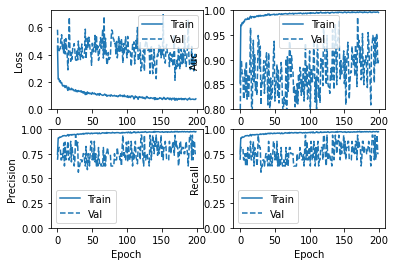

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.96      0.84      0.90       234
   PNEUMONIA       0.91      0.98      0.94       390

    accuracy                           0.93       624
   macro avg       0.94      0.91      0.92       624
weighted avg       0.93      0.93      0.93       624



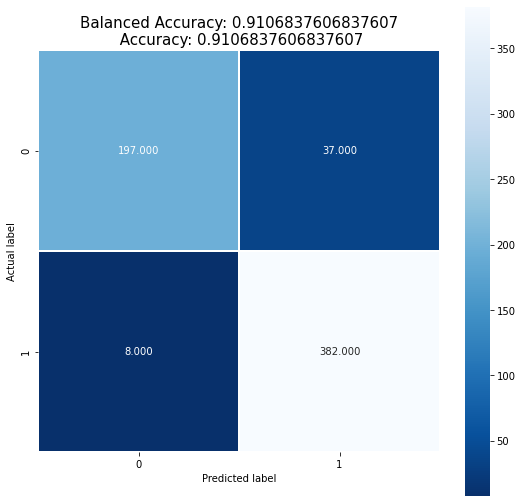

In [13]:
cnn.display_confusion_matrix(test_set)